In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import Image, display
#Heavy lifting is done in the imported module below
from sparse_fluxqubit import *

Most of this has been taken from the thesis of Pieter Christiaan de Groot. The code presented was adapted by Chris Warren for Python3 from Matlab code developed in Delft.

# Flux qubits

The flux qubit consists of a superconducting loop interupted by at least three Josephson junctions. The following will describe the derivation of the four junction flux qubit. In any case the three junction flux qubit can be obtained by increasing the relative size of the fourth junction. This well approximates a short in the limit as the junction area approaches infinity.

The Lagrangian of an m junction flux qubit is given by,

\begin{align}
\mathcal{L} &= \sum_{i=1}^{m-1} \frac{e^2}{E_{C,i}}\Big(\frac{\Phi_0}{2\pi}\Big)^2\dot{\varphi}_{i}^{2} + \frac{e^2}{E_{C,m}}\Big(\frac{\Phi_0}{2\pi}\Big)\Big(\sum_{i=1}^{m-1}-\dot{\varphi}_i\Big)^2 \\
            &-\sum_{i}^{m-1}E_{J,i}\big(1-\cos(\varphi_i)\big) - E_{J,m}\bigg(1-\cos\bigg(-2\pi\frac{\Phi_{ext}}{\Phi_0} - \sum_{i=1}^{m-1}\varphi_i\bigg)\bigg)
\end{align}

One degree of freedom can be eliminated by the fluxoid-quantization constraint.
$$ \sum_i \varphi_i + 2\pi\frac{\Phi_{ext}}{\Phi_0}=2\pi n$$

Transforming into the charge basis charge basis takes, $\varphi \rightarrow -ih\frac{\partial}{\partial q}$. Since $E_J/E_C > 1$ the charge basis is more efficient as the cosine terms can be rewritten as $\cos(\varphi)=(e^{i\varphi}+e^{-i\varphi})/2$. The cosine is then represented in terms of the generator of translations of charge, coupling nearest integer states.

\begin{align}
e^{\pm i\varphi_i}|n_i> &= |n_i \pm 1> \\
e^{i(\varphi_i \pm k)}|n_i> &= e^{\pm ik}|n_i + 1>
\end{align}

Focusing on the four junction case the Hamiltonian of the circuit becomes,

\begin{align}
H =& \frac{E_C}{r_1 r_2 r_3 + r_1 r_2 r_4 + r_1 r_3 r_4 + r_2 r_3 r_4}\cdot
\\ &\Big( (r_2 r_3 + r_2 r_4 + r_2 r_4)n_{1}^{2} + (r_1 r_3 + r_1 r_4 + r_3 r_4)n_{2}^{2} + (r_1 r_2 + r_2 r_4 + r_1 r_4)n_{3}^{2} \\
&- 2r_3 r_4 n_1 n_2 - 2 r_2 r_4 n_1 n_3 - 2r_1 r_4 n_2 n_3 \Big) \\
-&E_J\Big(r_1 \cos(\varphi_1) + r_2 \cos(\varphi_2) + r_3\cos(\varphi_3) + r_4\cos\big(-\varphi_1 - \varphi_2 - \varphi_3 - 2\pi\frac{\Phi_{ext}}{\Phi_0}  \big)   \Big)
\end{align}

where $[r_1,r_2,r_3,r_4]$ are the relative junction sizes. The energy spectrum for typical junction parameters is plotted below as a function of the external flux $\Phi_{ext}/\Phi_0$.



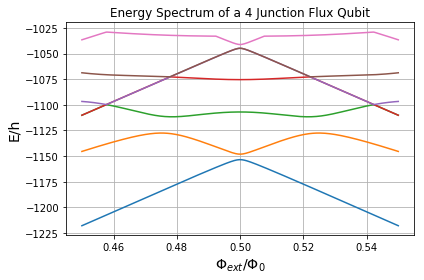

In [2]:
Ej = 350
Ec = 5
alpha = 0.7
beta = 1.42
f = np.linspace(0.45,0.55,256)
nmax = 10
nelevels = 7

energies = []
#Don't rerun calculations if they have been performed previously

#If the above numbers are changed then the saved image needs to
#be deleted to display the changes properly
try:
    i = Image(filename='./images/4JJ_EnergySpec.png')
    display(i)
except:
    ham_generator = four_junction_computation_sparse(nmax)
    for val in f:
        H = ham_generator(Ej,Ec,alpha,beta,beta,beta,val,0,0,0)
        eigs = sp.sparse.linalg.eigsh(H,
                                  k=nelevels,
                                  which='SA',
                                  return_eigenvectors=False)
        eigs = np.sort(eigs)
        energies.append(eigs)
    energies = np.array(energies)
    for i in range(nelevels):
        plt.plot(f,energies[:,i])
    plt.grid()
    plt.xlabel(r'$\Phi_{ext}/\Phi_{0}$',fontsize=14)
    plt.ylabel(r'E/h',fontsize=14)
    plt.title(r'Energy Spectrum of a 4 Junction Flux Qubit')
    plt.tight_layout()
    plt.savefig('./images/4JJ_EnergySpec.png')
    plt.show()
    


## Variations in Junction Size

There are two cases on interest. One which was already mentioned. By making the fourth junction much larger this results in the recovery of the three junction circuit (approximating the fourth junction as a short). The second is the case where all junctions except for the $\alpha$-junction are the same size.

As was stated previously, in the first image the energy gap saturates for $\beta \rightarrow \infty$. The fourth junction no longer participates in the dynamics and we approximate a three junction circuit.

In the second image as the ratio, $\alpha / \beta$ increases the gap correspondingly increases. The Josephson junctions approximate a linear inductor as they increase in size. The gap is then described by the ratio of the inductance between the $\alpha$-junction and the sum of the linear inductances of the smaller junctions. Where the inductance of a junction is given by,
$$L_J = \frac{\Phi_0}{2\pi}\frac{1}{I_C} $$

In [3]:
Delta_a = []
Delta_b = []
n = 201
nelevels=2
beta_a = np.linspace(1,101,n)
beta_b = np.linspace(1,1.6,n)
i1_flag=False
i2_flag=False
try:
    i1 = Image(filename='./images/4JJ_BetaScaling_a.png')
    display(i1)
except:
    i1_flag = True
    
try:
    i2 = Image(filename='./images/4JJ_BetaScaling_b.png')
    display(i2)
except:
    i2_flag = True

if i1_flag or i2_flag:
    ham_generator = four_junction_computation_sparse(nmax)   
    for i in range(n):
        if i1_flag:
            H_a = ham_generator(Ej,Ec,alpha,1,1,beta_a[i],0.5,0,0,0)
            eigs_a = sp.sparse.linalg.eigsh(H_a,
                                  k=nelevels,
                                  which='SA',
                                  return_eigenvectors=False)
            eigs_a = np.sort(eigs_a)
            Delta_a.append(eigs_a[1]-eigs_a[0])
        if i2_flag:
            H_b = ham_generator(Ej,Ec,alpha,beta_b[i],beta_b[i],beta_b[i],0.5,0,0,0)        
            eigs_b = sp.sparse.linalg.eigsh(H_b,
                                  k=nelevels,
                                  which='SA',
                                  return_eigenvectors=False)
            eigs_b = np.sort(eigs_b)
            Delta_b.append(eigs_b[1]-eigs_b[0])
    if i1_flag:    
        plt.plot(beta_a,Delta_a)
        plt.plot([0,101],[5.0,5.0],'k--')
        plt.grid()
        plt.title(r'Gap Scaling [$\alpha$,1,1,$\beta$]')
        plt.xlabel(r'$\beta$',fontsize=14)
        plt.ylabel(r'$\Delta$',fontsize=14)
        plt.tight_layout()
        plt.savefig('./images/4JJ_BetaScaling_a.png')
        plt.show()
    if i2_flag:
        plt.plot(beta_b,Delta_b)
        plt.plot([1,1.4],[5.0,5.0],'k--')
        plt.plot([1.4,1.4],[0,5.0],'k--')
        plt.grid()
        plt.title(r'Gap Scaling [$\alpha$,$\beta$,$\beta$,$\beta$]')
        plt.xlabel(r'$\beta$',fontsize=14)
        plt.ylabel(r'$\Delta$',fontsize=14)
        plt.tight_layout()
        plt.savefig('./images/4JJ_BetaScaling_b.png')
        plt.show()
    

KeyboardInterrupt: 

## Loop Self Inductance

For large superconducting loops the above Hamiltonian will not suffice. There is an extra potential term that comes into play when loop areas become large due to the geometric effects of the circuit. This element is critical for describing the mutual inductance between two qubits as well as correctly modelling flux qubit parameters. We stated previously that in the case of the large junctions they begin to act like linear inductors. In that case the self inductance can be added into the inductance of the large junctions giving us a rescaling of the junction areas. The rescaled participation of each junction is then given as, [$\alpha$,$\beta'$,$\beta'$,$\beta'$].

## Transition Elements

In [ ]:
f = np.linspace(0.,1,201)
nelevels = 3
t01 = []
t12 = []
t02 = []


try:
    i = Image(filename='./images/4JJ_TransitionElements.png')
    display(i)
except:
    ham_gen = four_junction_computation_sparse(nmax)
    # Sine driving term only
    t_matrix = transition_matrix(nmax)

    for val in f:
        H = ham_gen(Ej,Ec,alpha,beta,beta,beta,val,0,0,0)
        transition = t_matrix(val)
        eigs,evecs = sp.sparse.linalg.eigsh(H,
                                        k=nelevels,
                                        which='SA',
                                        return_eigenvectors=True)
        # Need to do this to get around some silly zip functionality
        # with numpy arrays
        temp = []
        for i in range(nelevels):
            temp.append(evecs[:,i])
        zipped = zip(eigs,temp)
        #Sort in terms of ascending eigenvalues and unzip
        eigs, evecs = zip(*sorted(zipped, key=lambda x: x[0]))
        #Convert evecs to sparse for fast matrix math
        evecs = np.transpose(np.array(evecs))
        evecs = sp.sparse.csc_matrix(evecs)
        
        #Compute transition elements
        t01_temp = (evecs[:,1].H).dot(transition.dot(evecs[:,0]))
        t12_temp = (evecs[:,2].H).dot(transition.dot(evecs[:,1]))
        t02_temp = (evecs[:,2].H).dot(transition.dot(evecs[:,0]))
        
        t01.append(np.abs(t01_temp.data[0]))
        t12.append(np.abs(t12_temp.data[0]))
        t02.append(np.abs(t02_temp.data[0]))
    
    plt.plot(f,t01)
    plt.plot(f,t12)
    plt.plot(f,t02)
    plt.legend([r'$|t_{01}|$',r'$|t_{12}|$',r'$|t_{02}|$'])
    plt.grid()
    plt.xlabel(r'$\Phi_{ext}/\Phi_0$',fontsize=14)
    plt.ylabel(r'$|t_{ij}|$',fontsize=14)
    plt.title(r'Transition Matrix Elements for a Flux Qubit')
    plt.tight_layout()
    plt.savefig('./images/4JJ_TransitionElements.png')
    plt.show()